In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer_data = load_breast_cancer()

In [16]:
cancer_data.keys()

dict_keys(['DESCR', 'target_names', 'data', 'feature_names', 'target'])

In [17]:
len(cancer_data['feature_names'])

30

In [18]:
df =pd.DataFrame(data = cancer_data['data'], columns=cancer_data['feature_names'])

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
sc.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
df_scaled= sc.transform(df)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2)

In [36]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca12 = pca.transform(df_scaled)

In [38]:
type(pca12)

numpy.ndarray

In [39]:
df_pca = pd.DataFrame(data = pca12, columns=['PC1','PC2'])

In [40]:
df_pca.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [41]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
PC1    569 non-null float64
PC2    569 non-null float64
dtypes: float64(2)
memory usage: 9.0 KB


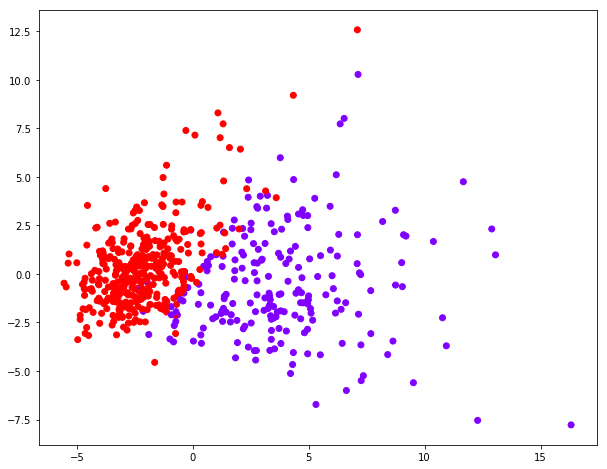

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(x = df_pca['PC1'], y=df_pca['PC2'],c = cancer_data['target'], cmap='rainbow')

In [43]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [44]:
df_pca_comp = pd.DataFrame(data = pca.components_,columns=cancer_data['feature_names'])

In [45]:
df_pca_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


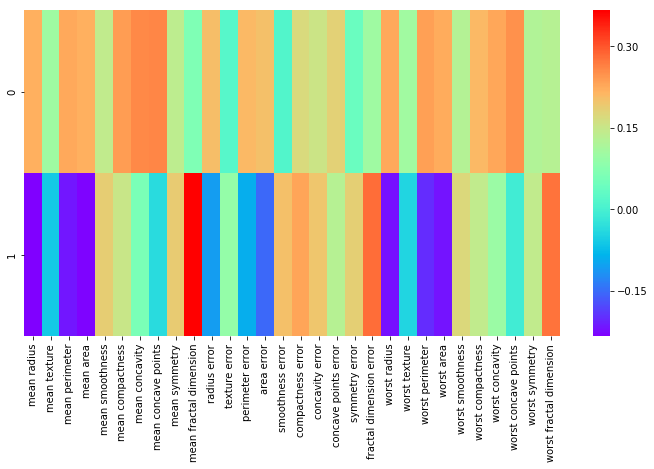

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df_pca_comp, cmap='rainbow')

In [47]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_pca
y = cancer_data['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logReg = LogisticRegression()

In [65]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred = logReg.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 60   3]
 [  2 106]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96        63
          1       0.97      0.98      0.98       108

avg / total       0.97      0.97      0.97       171

